In [33]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

with open('../group.json') as f:
    data = json.load(f)
    ocrnet = pd.DataFrame(data['ocrnet'])
    pointrend = pd.DataFrame(data['point_rend'])
    dmnet = pd.DataFrame(data['dmnet'])

In [34]:
df = pd.concat([ocrnet, pointrend, dmnet])

In [35]:
df

,network,backbone,pretrained,aAcc,mDice,mAcc,data_time,time,step
0,OCRNet,HRNet,ade,85.19,8.24,9.31,0.033609,0.086956,1
1,OCRNet,HRNet,ade,89.88,9.76,9.08,0.017576,0.071249,2
2,OCRNet,HRNet,cityscapes,88.52,6.96,6.85,0.032560,0.137402,1
3,OCRNet,HRNet,cityscapes,89.25,7.23,6.72,0.046495,0.164720,2
4,OCRNet,Resnet,cityscapes,87.84,8.88,9.09,0.032881,0.097223,1
5,OCRNet,Resnet,cityscapes,84.90,7.82,7.97,0.018447,0.062624,2
0,PointRend,NaN,ade,91.11,12.10,11.72,0.018081,0.054526,1
1,PointRend,NaN,ade,91.82,14.12,13.30,0.016509,0.053082,2
2,PointRend,NaN,cityscapes,91.08,11.99,11.79,0.037956,0.105572,1
3,PointRend,NaN,cityscapes,91.97,14.36,13.66,0.032778,0.068778,2


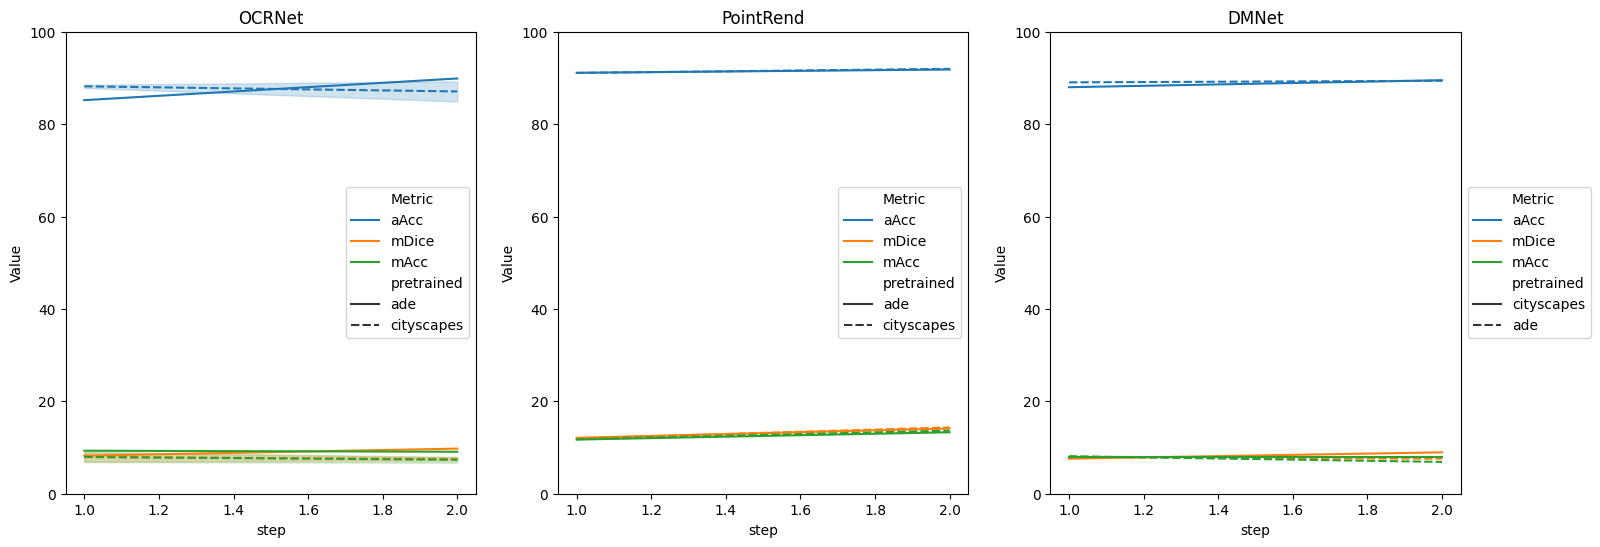

In [115]:
# Assuming you have already imported ocrnet, pointrend, and dmnet dataframes

# Melt the dataframes
ocrnet_melted = pd.melt(ocrnet, id_vars=['step', 'pretrained'], value_vars=['aAcc', 'mDice', 'mAcc'], var_name='Metric', value_name='Value')
pointrend_melted = pd.melt(pointrend, id_vars=['step', 'pretrained'], value_vars=['aAcc', 'mDice', 'mAcc'], var_name='Metric', value_name='Value')
dmnet_melted = pd.melt(dmnet, id_vars=['step', 'pretrained'], value_vars=['aAcc', 'mDice', 'mAcc'], var_name='Metric', value_name='Value')

# Create subplots
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Plot using Seaborn
sns.lineplot(data=ocrnet_melted, x='step', y='Value', hue='Metric', style="pretrained", ax=ax[0])
ax[0].set_title("OCRNet")
ax[0].set_ylim(0, 100)

sns.lineplot(data=pointrend_melted, x='step', y='Value', hue='Metric', style="pretrained", ax=ax[1])
ax[1].set_title("PointRend")
ax[1].set_ylim(0, 100)

sns.lineplot(data=dmnet_melted, x='step', y='Value', hue='Metric', style="pretrained", ax=ax[2])
ax[2].set_title("DMNet")
ax[2].set_ylim(0, 100)

# Adjust legend
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Show plot
plt.show()
